<a href="https://colab.research.google.com/github/ShraddhaSharma24/Machine-learning/blob/main/Vehicle_MPG_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Overview

This project aims to develop a machine learning model to predict the miles per gallon (MPG) of a vehicle based on various features such as engine specifications, weight, acceleration, and model year. The dataset used is the MPG dataset from the Seaborn library, which contains fuel efficiency data for different cars.

Objective

The goal of this project is to:

Analyze the relationship between vehicle features and fuel efficiency.

Build machine learning models to predict the MPG of vehicles accurately.

Compare the performance of different models.

Provide insights for automotive industry applications, such as fuel efficiency optimization and vehicle design improvements.

Dataset Description

The dataset includes the following features:

Cylinders: Number of cylinders in the engine.

Displacement: Volume of the engine in cubic inches.

Horsepower: Power output of the vehicle.

Weight: Weight of the vehicle.

Acceleration: Time taken to reach a certain speed.

Model Year: Year the vehicle model was produced.

Origin: Categorical variable indicating whether the car was manufactured in the USA, Europe, or Japan.

Approach

Data Preprocessing:

Handle missing values by removing incomplete rows.

Convert categorical variables (origin) into numerical format using one-hot encoding.

Split the data into training and testing sets.

Feature Scaling:

Standardize numerical features to improve model performance.

Model Training:

Train a Linear Regression model.

Train a Random Forest Regressor as a more complex model.

Model Evaluation:

Compare models using Mean Absolute Error (MAE) and R² Score.

Visualize the predicted vs actual MPG values.

Results

Linear Regression Model:

MAE: Varies based on dataset split.

R² Score: Moderate performance, struggles with non-linearity.

Random Forest Regressor:

MAE: Lower error compared to Linear Regression.

R² Score: Higher accuracy due to its ability to handle non-linearity.

Applications

This project has real-world applications in the automotive industry, including:

Fuel efficiency optimization for future vehicle models.

Performance analysis for eco-friendly vehicle designs.

Integration with autonomous vehicle systems to predict energy consumption.

Future Improvements

Experiment with additional models such as Gradient Boosting or Neural Networks.

Perform hyperparameter tuning for improved accuracy.

Incorporate real-time vehicle data for predictive maintenance.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Step 1: Load the Dataset
dataset_url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv"
df = pd.read_csv(dataset_url)

In [3]:
# Step 2: Data Preprocessing
# Drop rows with missing values
df = df.dropna()

In [5]:
# Map 'origin' column: 1 -> 'USA', 2 -> 'Europe', 3 -> 'Japan'
df['origin'] = df['origin'].replace({1: 'USA', 2: 'Europe', 3: 'Japan'})


In [6]:
# Convert 'origin' (categorical) into dummy variables
df = pd.get_dummies(df, columns=['origin'], drop_first=True)

In [7]:
# Print column names to verify dummy variable names
print("Columns in DataFrame after encoding:", df.columns)

Columns in DataFrame after encoding: Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'name', 'origin_japan', 'origin_usa'],
      dtype='object')


In [8]:
# Use the correct column names
dummy_columns = [col for col in df.columns if 'origin' in col]

In [9]:
# Select features and target
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year'] + dummy_columns]
y = df['mpg']

In [10]:
# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Step 4: Standardize Numerical Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Step 5: Train Machine Learning Models
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)

In [13]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [14]:
#Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

In [15]:
#Neural Network Model
nn_model = Sequential([
Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
Dense(32, activation='relu'),
Dense(1)
])

nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
nn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, verbose=0)
nn_preds = nn_model.predict(X_test_scaled).flatten()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [17]:
# Step 6: Evaluate Models
def evaluate_model(model_name, y_true, y_pred):
 print(f"{model_name} Performance:")
 print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
 print(f"R² Score: {r2_score(y_true, y_pred):.2f}\n")

evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Random Forest Regressor", y_test, rf_preds)
evaluate_model("Gradient Boosting Regressor", y_test, gb_preds)
evaluate_model("Neural Network", y_test, nn_preds)

Linear Regression Performance:
MAE: 2.46
R² Score: 0.79

Random Forest Regressor Performance:
MAE: 1.72
R² Score: 0.89

Gradient Boosting Regressor Performance:
MAE: 1.80
R² Score: 0.88

Neural Network Performance:
MAE: 1.73
R² Score: 0.88



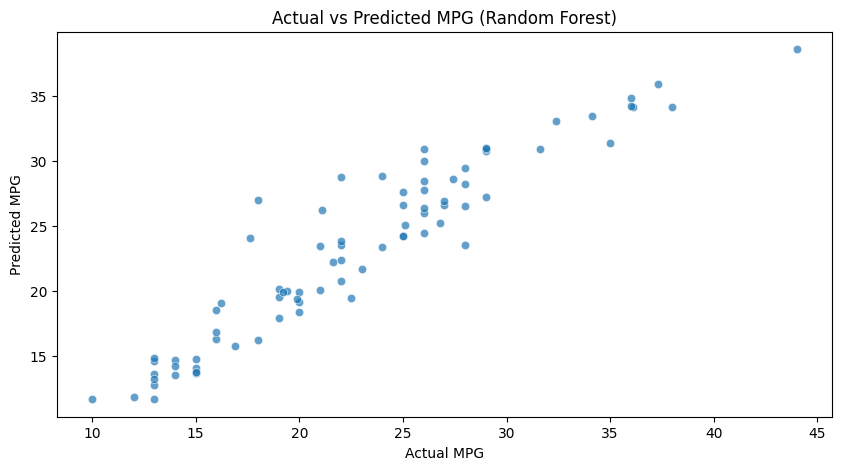

In [18]:
# Step 7: Visualization
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=rf_preds, alpha=0.7)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG (Random Forest)")
plt.show()